# Convolutional Neural Networks (CNN)



#Flowers Dataset
a dataset of two types of flower, buttercups and artichokes is provided. Build a CNN to identify the flower type.

The authors of the full dataset help to visualise the classes:

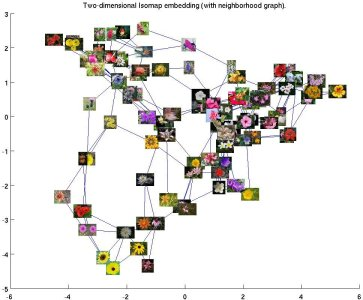

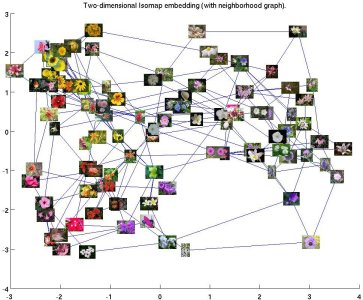

From this, we can see that colour data could be very helpful to our model...

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# the data set that is uploaded to google drive is unzipped here
!unzip uos-com2028-21-22-5.zip

401 - Unauthorized
unzip:  cannot find or open uos-com2028-21-22-lab5.zip, uos-com2028-21-22-lab5.zip.zip or uos-com2028-21-22-lab5.zip.ZIP.


We can use the [`image_dataset_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory) utility function to load the images. This is handy because it won't load all the images at once (which can cause you to run out of memory: if using Colab, see the RAM indicator in the toolbar).

Now to load the dataset:

In [ ]:
import pathlib
from google.colab import drive
import tensorflow as tf
drive.mount('/content/gdrive')
mypath = '/content/gdrive/MyDrive/uos-com2028-21-22-lab5/'#ABFlowerTrain'

data = pathlib.Path('/content/gdrive/MyDrive/uos-com2028-21-22-lab5/') 



import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt



dataset_path = '/content/gdrive/MyDrive/uos-com2028-21-22-lab5/ABFlowerTrain'

dataset_path_t = '/content/gdrive/MyDrive/uos-com2028-21-22-lab5/ABFlowerTest'


Mounted at /content/gdrive


In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(dataset_path,target_size=(100,100),batch_size=106,class_mode='binary')

Found 96 images belonging to 2 classes.


In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255)
test_generator=train_datagen.flow_from_directory(dataset_path_t,target_size=(100,100),batch_size=25,class_mode='binary')

Found 23 images belonging to 2 classes.


Let's take a look:

Since this is a binary classification task, you can use one-hot or boolean/integer encoding for the targets. 

The dataset currently uses 0 and 1 for the targets: making the classifier an 'Is artichoke?' (or 'Is buttercup?', depending on ordering) classifier.

You can change this to one-hot encoding if you want using a `label_mode` of `categorical`.

Now create a Keras sequential model using the techniques covered in today's lab:

In [ ]:
# To normalise the dataset without first loading the images into memory, we can use a Rescaling layer.
# This means images are normalised when given as input to the model.
import tensorflow as tf
from keras.layers import Rescaling
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Conv3D
# We need keras.backend and tensorflow to create proper tensors directly
import keras.backend as K
import keras
import numpy as np
from numpy.random import seed



# Your code here: create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='tanh', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Your code here: compile the model with suitable losses and metrics.
from tensorflow.keras.optimizers import RMSprop,Adam,SGD
model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.001),
              metrics=['acc'])

# Now train the model...
total_sample=train_generator.n
n_epochs = 50

history = model.fit_generator(
        train_datagen,  
        epochs=n_epochs,
        verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7331 - acc: 0.4896
Epoch 2/50
1/1 [==============================] - 1s 592ms/step - loss: 0.7197 - acc: 0.4896
Epoch 3/50
1/1 [==============================] - 1s 600ms/step - loss: 0.7077 - acc: 0.4896
Epoch 4/50
1/1 [==============================] - 1s 595ms/step - loss: 0.6968 - acc: 0.4896
Epoch 5/50
1/1 [==============================] - 1s 638ms/step - loss: 0.6869 - acc: 0.4896
Epoch 6/50
1/1 [==============================] - 1s 607ms/step - loss: 0.6778 - acc: 0.4896
Epoch 7/50
1/1 [==============================] - 1s 588ms/step - loss: 0.6695 - acc: 0.4896
Epoch 8/50
1/1 [==============================] - 1s 601ms/step - loss: 0.6617 - acc: 0.5104
Epoch 9/50
1/1 [==============================] - 1s 568ms/step - loss: 0.6545 - acc: 0.5208
Epoch 10/50
1/1 [==============================] - 1s 591ms/step - loss: 0.6477 - acc: 0.5625
Epoch 11/50
1/1 [==============================] - 1s 586ms/step - loss:

Now for the predictions:


In [ ]:
imgs,labes=test_generator[0]
labes

array([0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
predictions=model.predict_generator(test_generator)
for i in range(23):
  if predictions[i]>0.5:
    predictions[i]=1
  else:
    predictions[i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
#from sklearn.metrics import accuracy_score
#accuracy_score(predictions,labes)#for images, labels in test_generator:
#print(labes)
#for i in range(5):
#    ax = plt.subplot(1, 5, i + 1)
#    plt.imshow(imgs[i])
#    plt.axis('off')  


You may need to threshold or convert from one-hot encoding to get the correct labels, which should be 'A' for artichoke or 'B' for buttercup (not 0 or 1!). See week 3's lab for an example of this.

Set `final_predictions` to the final labelled outputs for the test samples, consisting of only 'A's or 'B's.

In [ ]:
# Example for an integer output:
final_predictions = ['B' if prediction > 0.5 else 'A' for prediction in predictions]

# Example for one-hot:
#final_predictions = ['B' if prediction == 1 else 'A' for prediction in np.argmax(predictions, axis=1)]


Save the output to a CSV:

In [ ]:
from pandas import DataFrame
DataFrame(data={'Flower': final_predictions}).to_csv('predictions.csv', index_label='Id')